In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot  import imshow
import cv2
from PIL import Image
from numpy import asarray

<h3>Declare some basic functions</h3>

In [2]:
def downshift_column_by_k(matrix, col, k):
    n_rows = len(matrix)
    shifted_matrix = matrix.copy()
    arr=[]
    
    for i in range(k):
        arr.append(matrix[n_rows-k+i][col])
    # shift the values in the column down by k positions
    for i in range(n_rows-1, k-1, -1):
        shifted_matrix[i][col] = matrix[i-k][col]
    
    # move the first k elements of the column to the end
    for i in range(k):
        shifted_matrix[i][col] = arr[i]
    
    return shifted_matrix


def downshift_column(matrix, k):
    n_cols = len(matrix[0])
    shifted_matrix = matrix.copy()
    
    # downshift each column by k positions
    for j in range(n_cols):
        shifted_matrix = downshift_column_by_k(shifted_matrix, j, k)
    
    return shifted_matrix

In [3]:
def right_shift_array(arr, k):
#     n = len(arr)
#     k = k % n  # handle cases where k > n
    
#     # shift the last k elements to the front
#     shifted_arr = arr[n-k:] + arr[:n-k]
#     # print(shifted_arr)
#     return shifted_arr

    for i in range(0, k):    
        #Stores the last element of array    
        last = arr[len(arr)-1]
        
        for j in range(len(arr)-1, -1, -1):    
            #Shift element of array by one    
            arr[j] = arr[j-1]
            
            #Last element of the array will be added to the start of the array.    
    
        arr[0] = last
    return arr

def left_shift_array(arr,n):
    for i in range(0, n):    
        first = arr[0]
        for j in range(0, len(arr)-1):    
            #Shift element of array by one    
            arr[j] = arr[j+1]
            
    #First element of array will be added to the end    
        arr[len(arr)-1] = first
    return arr

In [4]:
def digSum(n):
    sum = 0
    while n > 0 or sum > 9:
        if n == 0:
            n = sum
            sum = 0
        sum += n % 10
        n //= 10
    return sum

def remove(n):
    num_str = str(n)
    if num_str.startswith('0.'):
        num_str = num_str[2:]
    num = int(num_str)
    return num

def divide(n):
    integer_part, decimal_part = divmod(n, 1)
    return integer_part,decimal_part

<h1>Original Image</h1>

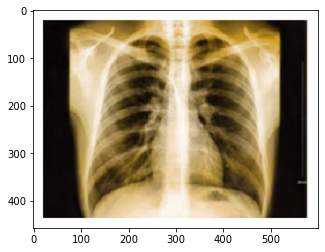

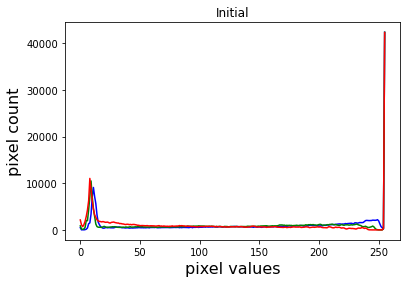

In [34]:
img = cv2.imread("C:\\Users\\Aayush\\Downloads\\m1.jpg")
plt.imshow(img)
plt.show()
colors = ('b','g','r')

#compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('Initial')
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

<h4>Defning a lorez function</h4>

In [23]:
def lorenz_key(xinit, yinit, zinit, num_steps):

    # Initializing dt to a small value
    dt = 0.01

    # Initializing 3 empty lists
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Initializing initial values
    xs[0], ys[0], zs[0] = (xinit, yinit, zinit)

    # Initializing constants
    s = 10
    r = 28
    b = 2.667

    # System of equations
    for i in range(num_steps):
        xs[i + 1] = xs[i] + (s * (ys[i] - xs[i]) * dt)
        ys[i + 1] = ys[i] + ((xs[i] * (r - zs[i]) - ys[i]) * dt)
        zs[i + 1] = zs[i] + ((xs[i] * ys[i] - b * zs[i]) * dt)

    return xs, ys, zs


<h1>Encryption Level 1:encryption using lorenz substitution enryption</h1>

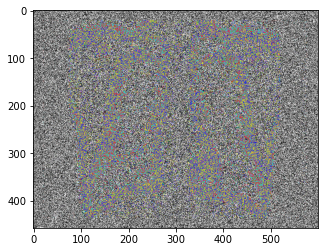

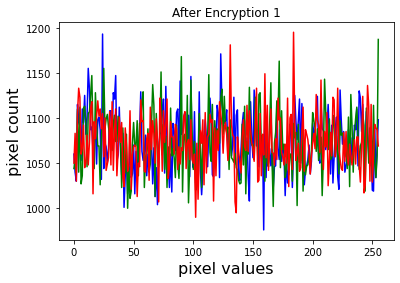

In [35]:
#encryption using sustitution
xkey, ykey, zkey  = lorenz_key(0.01, 0.02, 0.03, img.shape[0]*img.shape[1])
encryptedImage1 = np.zeros(shape=[img.shape[0], img.shape[1], 3], dtype=np.uint8)


l = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Converting the pseudo-random nuber generated into a number between 0 and 255
        zk = (int((zkey[l]*pow(10, 5))%256))
        # Performing the XOR operation
        encryptedImage1[i, j] = img[i, j]^zk
        l += 1
plt.imshow(encryptedImage1)
plt.show()

colors = ('b','g','r')
  
# compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([encryptedImage1],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('After Encryption 1')
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

<h1>Encryption level 2: Right Shift and Down Shift</h1>

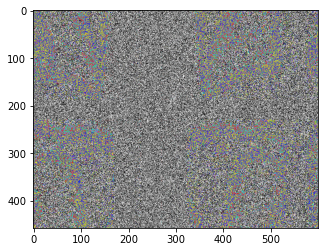

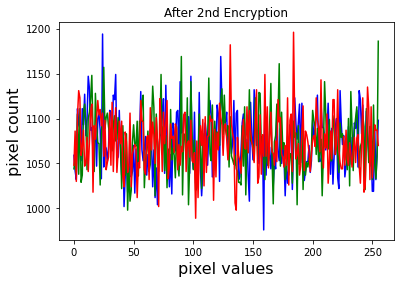

In [36]:
shiftkey = sum(xkey+ykey+zkey)
x,y=divide(shiftkey)
x=int(x)
y=remove(y)
x=digSum(x)
y=digSum(y)

z=int((img.shape[0]*img.shape[1]/(x+y))%img.shape[0])

j=0
for i in encryptedImage1:
#     print(i)
    encryptedImage1[j] = right_shift_array(i,z)
    j += 1

encryptedImage1=downshift_column(encryptedImage1,img.shape[0]-z)

plt.imshow(encryptedImage1)
plt.show()
colors = ('b','g','r')

#compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([encryptedImage1],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('After 2nd Encryption')
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

<h4>Defining logistic map function</h4>

In [26]:
def logistic_key(x, r, size):
    key = []

    for i in range(size):   
        x = r*x*(1-x)   # The logistic equation
        key.append(int((x*pow(10, 16))%256))    # Converting the generated number between 0 to 255

    return key

<h1>Encryption Level 3</h1>

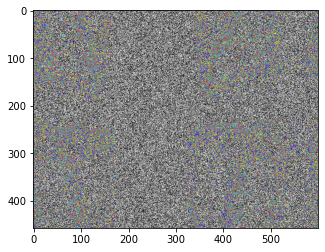

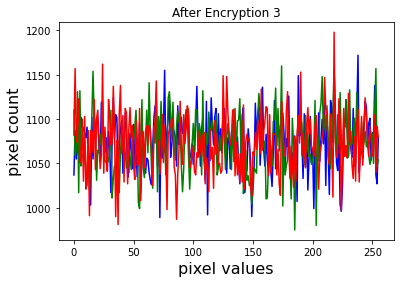

In [27]:
generatedKey = logistic_key(0.01, 3.95, img.shape[0]*img.shape[1]) 
# Encryption using XOR
z = 0
# Initializing the encrypted image
encryptedImage2 = np.zeros(shape=[img.shape[0], img.shape[1], 3], dtype=np.uint8)

# Substituting all the pixels in original image with nested for
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # USing the XOR operation between image pixels and keys
        encryptedImage2[i, j] = encryptedImage1[i, j].astype(int) ^ generatedKey[z]
        z += 1

# Displaying the encrypted image
plt.imshow(encryptedImage2)
plt.show()
colors = ('b','g','r')

#compute and plot the image histograms
for i,color in enumerate(colors):
    hist = cv2.calcHist([encryptedImage2],[i],None,[256],[0,256])
    plt.plot(hist,color = color)
plt.title('After Encryption 3')
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()


<h1>Decryption Level 1</h1>

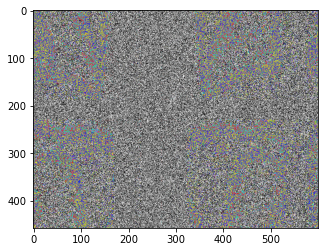

In [28]:
# Decryption using XOR
z = 0

# Initializing the decrypted image
decryptedImage1 = np.zeros(shape=[img.shape[0], img.shape[1], 3], dtype=np.uint8)

# Substituting all the pixels in encrypted image with nested for
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # USing the XOR operation between encrypted image pixels and keys
        decryptedImage1[i, j] = encryptedImage2[i, j].astype(int) ^ generatedKey[z]
        z += 1

# Displaying the decrypted image
plt.imshow(decryptedImage1)
plt.show()

# histogram_blue = cv2.calcHist([decryptedImage1],[0],None,[256],[0,256])
# plt.plot(histogram_blue, color='blue') 
# histogram_green = cv2.calcHist([decryptedImage1],[1],None,[256],[0,256]) 
# plt.plot(histogram_green, color='green') 
# histogram_red = cv2.calcHist([decryptedImage1],[2],None,[256],[0,256]) 
# plt.plot(histogram_red, color='red') 
# plt.title('Intensity Histogram - Logistic Decrypted Image ', fontsize=20)
# plt.xlabel('pixel values', fontsize=16)
# plt.ylabel('pixel count', fontsize=16) 
# plt.show()

<h1>Decryption Level 2</h1>

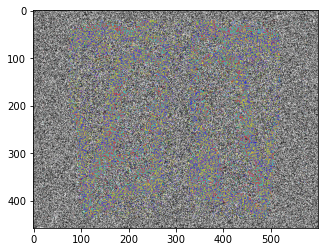

In [29]:
z=int((img.shape[0]*img.shape[1]/(x+y))%img.shape[0])
img=downshift_column(decryptedImage1,z)
j=0
for i in img:
#     print(i)
    img[j] = left_shift_array(i,z)
    j += 1
plt.imshow(img)
plt.show()

<h1>Decryption Level 3</h1>

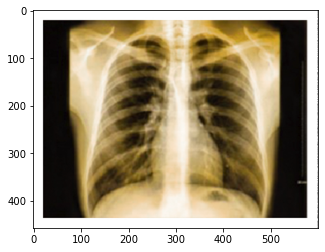

In [32]:
#decryption from substitution

decryptedImage = np.zeros(shape=[img.shape[0], img.shape[1], 3], dtype=np.uint8)

l = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Converting the pseudo-random nuber generated into a number between 0 and 255
        zk = (int((zkey[l]*pow(10, 5))%256))
        # Performing the XOR operation
        decryptedImage[i, j] = img[i, j]^zk
        l += 1
plt.imshow(decryptedImage)